## Machine Learning - Recommender System 

## 0. Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 1. Dataset

In [2]:
movies = pd.read_csv('movies.csv')        

In [3]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


## 2. Data Preparation

### 2.1 Identifying the list of unique genre

In [4]:
genres_list = []
for genre in movies['genres']:
    genre_splitted = genre.split('|')
    for item in genre_splitted:
        if item not in genres_list:
            genres_list.append(item)
            
print(genres_list)

['Adventure', 'Animation', 'Children', 'Comedy', 'Fantasy', 'Romance', 'Drama', 'Action', 'Crime', 'Thriller', 'Horror', 'Mystery', 'Sci-Fi', 'War', 'Musical', 'Documentary', 'IMAX', 'Western', 'Film-Noir', '(no genres listed)']


### 2.2 Creating individual columns for each genre

In [5]:
#initial value is set to zero for all new columns
for genre in genres_list:
    movies[genre] = 0
movies.head()

,movieId,title,genres,Adventure,Animation,Children,Comedy,Fantasy,Romance,Drama,...,Horror,Mystery,Sci-Fi,War,Musical,Documentary,IMAX,Western,Film-Noir,(no genres listed)
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 2.3 Using indicator to indicate the presence of a genre

In [6]:
for index,row in movies.iterrows():
    print(row['genres'])

Adventure|Animation|Children|Comedy|Fantasy
Adventure|Children|Fantasy
Comedy|Romance
Comedy|Drama|Romance
Comedy
Action|Crime|Thriller
Comedy|Romance
Adventure|Children
Action
Action|Adventure|Thriller
Comedy|Drama|Romance
Comedy|Horror
Adventure|Animation|Children
Drama
Action|Adventure|Romance
Crime|Drama
Drama|Romance
Comedy
Comedy
Action|Comedy|Crime|Drama|Thriller
Comedy|Crime|Thriller
Crime|Drama|Horror|Mystery|Thriller
Action|Crime|Thriller
Drama|Sci-Fi
Drama|Romance
Drama
Children|Drama
Drama|Romance
Adventure|Drama|Fantasy|Mystery|Sci-Fi
Crime|Drama
Drama
Mystery|Sci-Fi|Thriller
Children|Drama
Crime|Drama
Children|Comedy
Comedy|Romance
Drama
Drama|War
Action|Crime|Drama
Drama
Action|Adventure|Fantasy
Comedy|Drama|Thriller
Drama|Romance
Mystery|Thriller
Animation|Children|Drama|Musical|Romance
Drama|Romance
Crime|Mystery|Thriller
Comedy|Drama|Romance
Adventure|Drama
Children|Comedy
Drama
Drama
Comedy|Drama|Romance
Adventure|Children|Fantasy
Drama|Thriller
Drama
Comedy|Crime
Co

Comedy
Adventure|Animation|Comedy
Documentary
Drama|Fantasy|Horror|Thriller
Comedy
Drama
Comedy
Crime|Thriller
Action|Adventure|Thriller
Horror
Action|Adventure|Romance|Thriller
Action|Sci-Fi
Animation|Sci-Fi
Horror|Thriller
Comedy
Animation|Children|Comedy
Comedy
Action|Sci-Fi|Thriller
Comedy|War
Drama
Documentary
Drama|War
Action|Adventure
Comedy|Crime
Drama|Romance
Comedy|Drama
Drama
Drama
Horror|Mystery
Comedy|Crime|Drama
Drama|Romance
Action|Adventure|Sci-Fi|Thriller
Drama
Drama|Thriller
Animation|Children|Drama|Musical|Romance
Comedy|Thriller
Comedy
Action|Drama|Thriller
Comedy|Fantasy|Romance|Sci-Fi
Drama
Documentary
Drama
Action|Adventure|Drama|Thriller
Comedy|Horror|Thriller
Drama|Mystery|Western
Children|Comedy
Drama|Romance
Comedy|Drama|Romance
Comedy|Romance
Drama|Thriller
Crime|Drama
Adventure|Children
Action|Adventure
Children|Comedy|Fantasy
Comedy
Comedy
Drama
Drama|Mystery
Adventure|Children
Comedy|Fantasy|Musical
Comedy
Crime|Thriller
Comedy
Drama
Action|Adventure|Thri

Comedy|Romance
Comedy|Drama
Drama
Drama|Mystery|Romance|Thriller
Crime|Drama|Thriller
Action
Drama|Romance
Crime|Drama|Film-Noir
Comedy
Horror|Sci-Fi|Thriller
Action|Comedy
Adventure|Romance
Action|Adventure
Action|Thriller
Drama|Thriller
Action|Adventure|Thriller
Drama|Romance
Comedy
Drama
Comedy
Adventure|Drama
Action|Thriller|War
Crime|Film-Noir|Mystery|Thriller
Adventure|Drama|War
Crime|Drama|Mystery|Thriller
Drama
Horror
Drama
Drama|Mystery|Thriller
Action|Drama|Thriller
Crime|Drama|Mystery
Comedy|Romance
Action|Thriller
Drama
Drama
Comedy|Drama|Romance
Comedy|Drama
Comedy|Drama
Drama|Romance
Horror|Mystery|Thriller
Drama|Mystery|Thriller
Children|Comedy|Romance|Sci-Fi
Crime|Drama|Thriller
Comedy|Drama
Documentary
Drama
Documentary
Drama|Sci-Fi|Thriller
Children|Drama|Fantasy
Drama|Horror|Thriller
Drama|Romance
Romance|Thriller
Drama
Drama
Crime|Mystery|Thriller
Crime
Comedy|War
Comedy
Action|Drama
Drama|War
Crime|Drama|Thriller
Drama
Drama
Drama|Romance|Thriller
Crime|Thriller
Ac

Drama|Fantasy|Thriller
Comedy|Crime
Adventure|Comedy
Comedy|Romance
Mystery|Thriller
Crime|Drama|Thriller
Drama|Romance
Drama
Drama
Action|Comedy|Crime|Thriller
Action|Adventure|Sci-Fi
Action|Crime|Thriller
Horror|Thriller
Crime
Action|Crime|Drama
Comedy|Drama
Drama
Comedy
Horror|Sci-Fi|Thriller
Action|Horror|Sci-Fi|Thriller
Comedy|Crime|Drama
Comedy|Drama
Drama|Fantasy|Romance
Comedy|Romance
Adventure|Animation|Children|Comedy|Fantasy
Comedy
Comedy
Adventure|Drama|Fantasy|Romance
Thriller
Comedy
Comedy|Musical
Comedy
Drama|Musical
Drama
Comedy
Action|Crime
Drama
Sci-Fi
Drama
Drama
Drama
Comedy|Horror|Thriller
Drama|Fantasy|Mystery|Romance
Comedy|Drama
Drama|Thriller
Comedy|Drama|Fantasy
Action|Sci-Fi|War
Documentary
Comedy|Drama|Romance|War
Comedy
Fantasy|Horror|Thriller
Horror|Western
Crime|Drama
Comedy|Documentary
Comedy|Drama|Romance
Crime|Drama
Drama
Action|Thriller
Comedy
Drama
Drama
Horror|Mystery|Thriller
Comedy|Romance
Romance
Comedy|Drama
Action|Adventure|Drama|Thriller
Myste

Comedy|Drama
Comedy|Romance
Drama
Action
Adventure|Drama
Drama|Thriller
Adventure|Comedy|Fantasy|Sci-Fi
Drama|Romance
Adventure|Drama
Drama|Fantasy|Musical
Drama|War
Comedy|Crime|Drama
Horror|Thriller
Comedy|Drama
Drama
Comedy|Drama
Comedy|Romance
Drama
Horror|Thriller
Thriller
Documentary
Action|Crime|Drama|Sci-Fi|Thriller
Action|Crime|Sci-Fi|Thriller
Adventure|Animation|Children|Comedy|Crime|Fantasy|Mystery
Drama
Action|Adventure|Thriller
Action|Adventure|Thriller
Action|Adventure|Thriller
Horror|Thriller
Action|Adventure|Thriller
Horror|Thriller
Drama
Comedy|Drama|Fantasy
Action|Adventure|Animation|Drama|Fantasy
Documentary
Comedy|Drama|Romance|War
Comedy|Romance
Thriller
Drama|Thriller
Documentary
Drama|Sci-Fi
Drama
Drama
Comedy|Horror
Comedy
Thriller
Horror
Horror
Comedy|Horror|Sci-Fi
Crime|Drama
Action|Drama
Horror
Comedy|War
Horror|Sci-Fi
Comedy
Action|Drama
Action|Adventure
Comedy
Action|Drama|Sci-Fi|Thriller
Comedy|Sci-Fi
Adventure|Animation|Children|Comedy|Musical
Comedy|Dram

Horror
Horror
Horror
Horror
Comedy
Adventure|Animation|Children
Action|Drama|Thriller
Action|Crime|Drama|Thriller
Comedy
Drama
Drama
Drama
Drama|Thriller
Comedy|Romance
Comedy
Action|Drama
Drama
Action|Adventure|Sci-Fi
Comedy|Horror
Musical
Animation|Children
Drama|Film-Noir
Crime|Film-Noir
Drama
Comedy
Drama
Comedy|Mystery
Action|Comedy
Crime|Horror|Mystery|Thriller
Adventure|Children
Action|Comedy
Drama|Romance
Comedy
Drama
Action|Sci-Fi|Thriller
Drama|Romance
Action|Adventure|Thriller
Drama|War
Action|Sci-Fi|Thriller
Drama|Romance
Children|Comedy|Fantasy
Documentary
Animation|Children|Comedy
Children|Comedy
Drama|Romance|War
Drama|Romance
Drama|Sci-Fi
Action|Drama|Romance
Action|Adventure|Comedy|Fantasy
Drama
Action|Adventure
Adventure|Drama
Comedy
Comedy
Action|Adventure|Thriller
Adventure|Animation|Children|Sci-Fi
Drama
Drama|War
Drama
Comedy
Comedy|Crime|Thriller
Comedy|Drama
Drama|Romance
Comedy|Sci-Fi
Adventure|Animation|Children|Comedy|Fantasy
Drama
Comedy|Romance
Drama
Thrill

Drama|Romance
Adventure|Fantasy
Drama|War
Drama|Romance
Documentary|Musical
Romance|Western
Drama|Thriller
Comedy|Drama|Romance
Action|Horror
Comedy|Romance
Drama
Adventure|Drama
Comedy|Drama
Adventure|Romance
Action|Drama
Drama
Comedy
Horror|Sci-Fi|Thriller
Comedy|Drama|Romance
Comedy
Crime|Drama|Thriller
Action|Adventure|Thriller
Drama
Comedy
Drama
Drama|Thriller|War
Drama|Romance
Animation|Comedy|Musical
Action|Adventure|Crime|Thriller
Drama|Romance|Sci-Fi
Adventure|Animation|Children|Sci-Fi|IMAX
Horror|Thriller
Comedy|Horror
Crime|Drama
Drama|Romance
Comedy|Drama
Horror|Thriller
Crime|Drama|Thriller
Comedy
Action|Drama|War
Comedy|Crime
Crime|Drama
Comedy|Drama|Romance
Action|Sci-Fi|Thriller
Comedy|Drama|Horror
Comedy|Crime
Action|Drama|War
Sci-Fi
Action
Horror
Comedy|Drama|Musical|Romance
Comedy|Romance
Documentary
Comedy|Crime|Mystery|Thriller
Comedy|Drama|Musical|Romance
Comedy
Comedy|Romance
Action|Drama|Sci-Fi|Thriller
Comedy|Drama
Drama
Thriller
Drama
Adventure|Fantasy
Drama|W

Crime|Drama|Film-Noir|Romance|Thriller
Drama|Western
Drama
Comedy|Drama
Drama|Film-Noir|Mystery
Documentary
Animation|Comedy|Fantasy
Drama
Action|Comedy|Crime|Drama|Horror|Thriller
Sci-Fi
Drama|War
Drama
Horror|Thriller
Adventure|Children|Comedy|Fantasy|Musical
Action|Adventure|Drama|War
Drama
Drama|Sci-Fi|Thriller
Comedy|Romance
Adventure|Documentary
Comedy|Crime|Thriller
Comedy|Crime
Drama|Musical
Comedy|Drama|Romance
Comedy
Action|Adventure|Children|Comedy|Crime
Drama
Comedy|Romance
Drama
Comedy|Horror|Sci-Fi
Comedy|Horror|Thriller
Drama
Comedy|War
Comedy|Romance
Comedy
Comedy|Drama
Drama
Drama
Action|Adventure|Fantasy
Drama|War
Animation|Comedy|Fantasy|Musical
Crime|Drama|Mystery|Thriller
Comedy|Crime|Mystery
Action|Adventure|Drama|War
Adventure|Comedy
Action
Drama|Romance
Comedy|Drama
Comedy|Drama
Comedy
Adventure|Comedy
Drama
Comedy|Horror
Romance
Thriller
Comedy|Drama
Adventure|Drama
Action|Comedy|Crime|Thriller
Crime|Drama
Drama
Drama
Crime|Drama|Thriller
Film-Noir
Drama|War
Co

Drama|War
Adventure|Children|Comedy|Fantasy|IMAX
Drama|Romance
Adventure|Comedy|Fantasy
Drama
Drama|Musical|Romance
Drama|Musical
Drama
Comedy|Drama
Comedy
Crime|Drama|Thriller
Drama
Drama
Comedy|Fantasy
Drama
Animation|Documentary
Drama|Horror|Mystery|Sci-Fi|Thriller
Comedy|Drama|Romance
Comedy|Drama
Comedy
Children|Drama
Drama|Romance
Comedy|Thriller
Comedy|Romance
Crime|Drama
Action|Crime|Drama
Comedy|Drama
Drama|War
Comedy|Crime
Animation|Fantasy|Sci-Fi|War
Comedy|Drama
Action|Animation|Fantasy|Sci-Fi
Animation|Children|Musical
Action|Adventure|Crime|Drama
Children|Comedy
Drama
Drama
Comedy|Musical
Crime|Drama
Crime|Drama|Mystery|Thriller
Action|Adventure|Comedy|Crime|Romance|Thriller
Drama|War
Action|Crime|Drama|Thriller
Children|Comedy
Action|Horror|Sci-Fi|Thriller
Horror|Mystery|Thriller
Drama|Horror|Mystery|Thriller
Comedy|Romance
Drama
Drama
Comedy|Drama
Drama
Crime|Film-Noir
Action|Adventure|Sci-Fi
Crime|Drama|Thriller
Drama
Action|Adventure|Drama|Romance|War
Adventure|Animat

Crime|Horror|Thriller
Crime|Drama
Comedy|Fantasy|Horror
Action|Adventure|Fantasy|Sci-Fi
Animation|Children|Comedy
Action|Adventure|Sci-Fi
Adventure|Crime|Thriller
Comedy|Horror|Thriller
Action|Adventure|Crime|Horror|Thriller
Action|Adventure|Drama|War
Comedy|Drama
Comedy
Comedy
Documentary
Documentary|Drama
Drama|Thriller
Drama|Horror|Thriller
Comedy
Action|Adventure|Crime|Thriller
Comedy|Romance
Comedy|Fantasy
Action|Sci-Fi|Thriller|IMAX
Adventure|Drama|Fantasy|IMAX
Comedy|Romance
Drama|Thriller
Drama|Romance|Western
Documentary
Drama|Fantasy|Musical|Romance
Comedy
Adventure|Comedy|Fantasy|Romance
Animation|Comedy
Crime|Drama|Thriller
Comedy|Drama|Romance
Comedy|Drama
Action|Crime|Thriller
Documentary
Crime|Drama|Mystery|Thriller
Comedy
Comedy
Action|Comedy|Crime|Thriller
Action|Adventure|Fantasy|War
Comedy
Comedy
Action|Drama|Thriller
Comedy|Drama
Children|Comedy
Action|Drama|Horror|Sci-Fi|Thriller
Comedy|Drama|Romance
Horror
Drama|Thriller
Comedy|Drama|Romance
Documentary
Action|Com

Action|Adventure|Animation|Comedy|Thriller
Animation
Drama|Thriller|War
Drama
Drama
Animation|Comedy|Fantasy
Drama
Comedy
Adventure|Animation|Children|Comedy|Sci-Fi
Documentary
Drama
Crime|Drama|Fantasy|Horror|Thriller
Drama
Animation|Children|Fantasy|Musical|Romance
Action
Comedy|Crime|Drama|Romance
Fantasy|Romance
Action|Adventure|Fantasy
Action|Adventure|Sci-Fi|IMAX
Comedy|Romance
Action|Crime|Mystery|Thriller
Drama|Romance
Animation|Children|Comedy|Musical
Comedy
Comedy|Horror
Horror|Thriller
Comedy|Drama|Romance
Action|Drama|Horror|Thriller
Drama
Comedy|Romance
Action|Adventure|Drama
Action|Crime|Mystery
Crime|Drama
Crime|Drama
Comedy|Crime
Action|Horror|Thriller
Action|Adventure
Comedy
Comedy|Romance
Action|Comedy|Crime
Action|Comedy|Drama
Comedy|Drama
Action|Crime|Drama|Thriller
Adventure|Children|Comedy|Fantasy
Crime|Drama|Thriller
Comedy|Drama
Adventure|Animation|Children|Fantasy|Musical
Comedy
Action|Crime|Drama
Comedy|Drama|Romance
Action|Fantasy|Horror|Thriller
Comedy|Horro

Action|Adventure|Sci-Fi
Comedy
Comedy
Comedy
Action|Adventure|Sci-Fi|War|IMAX
Comedy|Drama|Romance
Action|Adventure|Comedy|Fantasy
Drama
Action|Crime|Thriller
Animation|Comedy|Drama
Comedy
Comedy|Crime
Adventure|Animation|Children|Comedy|IMAX
Documentary
Comedy|Crime
Documentary
Adventure|Comedy|Romance
Action|Adventure|Drama|Fantasy|Mystery|IMAX
Crime|Drama|Film-Noir|Thriller
Action|Adventure|Sci-Fi|Thriller|War
Comedy|Drama|Romance
Drama|Romance
Comedy|Crime
Animation|Children|Comedy
Horror
Action|Drama|War
Animation|Comedy
Animation|Children|Comedy
Comedy|Romance
Comedy|Drama
Action|Crime|Thriller
Crime|Drama|Thriller
Comedy
Drama
Action|Sci-Fi|Thriller
Action|Drama|Sci-Fi|Thriller
Comedy
Comedy
Drama
Action|Comedy|Crime
Comedy
Horror|Thriller|IMAX
Comedy
Horror|Thriller
Comedy|Horror
Drama|Romance|Sci-Fi
Drama
Horror
Drama|Thriller
Action|Adventure|Drama|Thriller
Documentary
Drama
Action|Adventure|Fantasy
Horror|Thriller
Romance|Thriller
Adventure|Comedy
Action|Crime|Horror|Thrille

Comedy
Action|Crime
Comedy|Crime|Drama
Comedy|Drama
Horror|Thriller
Drama
Documentary
Documentary
Action|Adventure|Sci-Fi|IMAX
Crime|Mystery|Thriller
Horror|Thriller
Comedy|Drama
Comedy|Drama|Romance
Action|Adventure|Fantasy|Sci-Fi|IMAX
Comedy
Crime|Horror|Thriller
Comedy|Fantasy
Documentary
Crime|Drama
Adventure|Animation|Comedy
Comedy
Action|Adventure|Animation
Horror|Thriller
Comedy|Romance
Action|Adventure|Sci-Fi|IMAX
Action|Adventure|Animation
Thriller
Comedy|Drama|Romance
Action|Drama|Horror|IMAX
Action|Drama|Sci-Fi|IMAX
Animation|Children|Comedy|IMAX
Action|Drama|Thriller|IMAX
Action|Comedy|Sci-Fi
Action|Crime|Thriller
Action|Comedy|Crime
Action|Adventure|Western|IMAX
Crime|Drama|Mystery|Thriller
Horror|Thriller
Comedy|Romance
Comedy|Drama|Romance
Comedy|Drama
Sci-Fi
Comedy|Documentary
Comedy|Drama|Romance
Comedy
Drama
Action|Comedy|Fantasy
Drama|Fantasy|Thriller|War
Horror|Thriller
Adventure|Animation|Children|Comedy|Fantasy
Action|Adventure|Fantasy|Sci-Fi
Comedy|Drama|Romance


Sci-Fi|Thriller
Action|Crime|Drama
Adventure|Children|Fantasy
Comedy
Action|Drama|Thriller|Western
Comedy
Animation|Drama|Fantasy
Comedy|Drama|Fantasy|Mystery|Romance
Action|Thriller
Documentary
Drama
Action|Crime|Thriller
Action|Crime|Drama|Mystery|Thriller
Drama
Action|Crime|Drama
Action|Adventure|Sci-Fi|Thriller
Comedy
Comedy
Crime|Drama|Horror|Mystery
Action|Comedy
Adventure|Children|Fantasy|Sci-Fi
Drama
Adventure|Children|Comedy
Animation|Children
Comedy
Drama
Documentary
Horror
Horror|Thriller
Adventure|Comedy|Romance
Comedy|Romance
Comedy
Comedy
Comedy|Horror|Mystery|Thriller
Comedy
Animation|Children|Comedy|Fantasy
Comedy|War
Children|Comedy
Drama|War
Horror|Mystery|Thriller
Action|Drama|Thriller
Sci-Fi
Action|Adventure|Sci-Fi|Thriller
Fantasy|Horror|Thriller
Action|Adventure|Fantasy|Sci-Fi|IMAX
(no genres listed)
Action|Adventure|Fantasy
Action|Adventure|Sci-Fi
(no genres listed)
Action|Adventure|Sci-Fi
Action|Adventure|Sci-Fi
Action|Adventure|Fantasy|Sci-Fi
Action|Adventure|C

Drama|Thriller
Action|Comedy|Thriller
Drama|Romance|Thriller
Adventure|Children|Fantasy
Children|Fantasy
Documentary
Animation|Comedy
Action|Drama
Comedy|Drama|Romance
Action|Horror|Sci-Fi
Drama
Drama
Mystery|Thriller
Comedy
Comedy|Drama
Action|Comedy|Thriller
(no genres listed)
Comedy|Drama|Romance
Adventure|Animation|Fantasy|Horror|Sci-Fi
Comedy|Drama|Romance
Comedy
Horror
Action|Adventure|Comedy
Drama
Comedy
(no genres listed)
Animation|Drama|Fantasy
Documentary
Comedy
Horror
Drama
Action|Comedy|Horror|Sci-Fi
Action|Comedy
Documentary
Action|Thriller
Drama
Drama|War
Action
Thriller
Action|Crime|Drama
Action|Adventure
Action|Horror|Sci-Fi
Comedy
Adventure|Animation|Children|Comedy
Horror
Adventure|Children|Fantasy
Drama
Drama
Action
Animation
Action|Drama|Thriller
Action|Drama|Thriller
Animation
Horror
Drama|Thriller
Horror|Sci-Fi
Drama
(no genres listed)
Comedy
Action|Drama
Sci-Fi
Crime|Drama
Comedy
Action
Action|Animation|Crime|Drama
Comedy
Crime|Drama
Action|Adventure|Animation|Dr

In [6]:
# Movie[movie,Genre] = 1, if genre is present in movie

for index,row in movies.iterrows():
    for current_genre in genres_list:
        if current_genre in row['genres']:
            movies.loc[index,current_genre] = 1

In [7]:
movies.head()

,movieId,title,genres,Adventure,Animation,Children,Comedy,Fantasy,Romance,Drama,...,Horror,Mystery,Sci-Fi,War,Musical,Documentary,IMAX,Western,Film-Noir,(no genres listed)
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,1,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 3. Movie Segmentation

### 3.1. Data Preparation for Clustering

In [8]:
#Drop the columns movieID, title and Genres
#select every other binary columns

movies_sub = movies.iloc[:,3:]
movies_sub.head()

,Adventure,Animation,Children,Comedy,Fantasy,Romance,Drama,Action,Crime,Thriller,Horror,Mystery,Sci-Fi,War,Musical,Documentary,IMAX,Western,Film-Noir,(no genres listed)
0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### 3.2. Agglomerative clustering (with cosine similarity and complete linkage)

In [9]:
#Packages
import sklearn
from sklearn.cluster import AgglomerativeClustering

#Dendrogram
import scipy
from scipy.cluster.hierarchy import dendrogram, linkage

In [10]:
#Plotting Dendrogram
Z = linkage(movies_sub, 'complete')

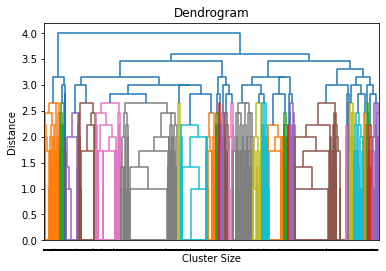

In [14]:
dendrogram(Z, leaf_rotation=90, leaf_font_size=1.)
plt.title('Dendrogram')
plt.xlabel('Cluster Size')
plt.ylabel('Distance')

plt.show()

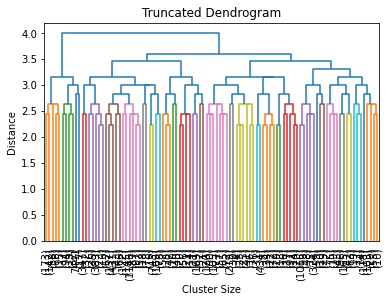

In [11]:
#Truncated Dendrogram
dendrogram(Z,truncate_mode='lastp',p=100,leaf_rotation=90, leaf_font_size=10. )
plt.title('Truncated Dendrogram')
plt.xlabel('Cluster Size')
plt.ylabel('Distance')

plt.show()

In [12]:
#Agglomerative hierarchical clustering
hclust = AgglomerativeClustering(n_clusters=10,affinity='cosine',linkage='complete')

In [13]:
hclust.fit(movies_sub)

AgglomerativeClustering(affinity='cosine', linkage='complete', n_clusters=10)

In [14]:
#Adding the cluster labels to the movie data
movies_sub['groups'] = hclust.labels_

In [15]:
movies_sub['movieId'] = movies['movieId']
movies_sub['title'] = movies['title']

In [16]:
movies_sub.head()

,Adventure,Animation,Children,Comedy,Fantasy,Romance,Drama,Action,Crime,Thriller,...,War,Musical,Documentary,IMAX,Western,Film-Noir,(no genres listed),groups,movieId,title
0,1,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,Toy Story (1995)
1,1,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,Jumanji (1995)
2,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,3,Grumpier Old Men (1995)
3,0,0,0,1,0,1,1,0,0,0,...,0,0,0,0,0,0,0,1,4,Waiting to Exhale (1995)
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,5,Father of the Bride Part II (1995)


### 3.3. Cluster Profiling

In [17]:
movies_sub.shape

(9742, 23)

In [18]:
movies_sub[['movieId','groups']].groupby(['groups']).count()

,movieId
groups,
0,2290
1,2486
2,1199
3,270
4,444
5,39
6,371
7,619
8,1643


In [19]:
profile = movies_sub.groupby(['groups']).mean()

In [20]:
profile = profile.transpose()

In [21]:
profile

groups,0,1,2,3,4,5,6,7,8,9
Adventure,0.125328,0.041432,0.338616,0.066667,0.004505,0.000000,1.000000,0.109855,0.004260,0.002625
Animation,0.110044,0.033789,0.090909,0.011111,0.000000,1.000000,0.237197,0.029079,0.010956,0.000000
Children,0.176419,0.037007,0.047540,0.000000,0.002252,0.051282,0.280323,0.006462,0.000000,0.000000
Comedy,0.227074,1.000000,0.220183,0.425926,0.504505,0.000000,0.261456,0.064620,0.004260,0.007874
Fantasy,0.127948,0.079646,0.124270,0.003704,0.000000,0.000000,0.099730,0.061389,0.038344,0.000000
Romance,0.068122,0.288013,0.018349,0.051852,0.081081,0.000000,0.040431,1.000000,0.010347,0.002625
Drama,0.314410,0.317377,0.241034,0.244444,0.509009,0.051282,0.277628,0.814216,1.000000,0.049869
Action,0.100000,0.006436,1.000000,0.170370,0.114865,0.153846,0.261456,0.093700,0.076689,0.000000
Crime,0.146725,0.012872,0.190992,0.222222,1.000000,0.179487,0.000000,0.046850,0.034693,0.013123
Thriller,0.336681,0.002011,0.376147,1.000000,0.060811,0.000000,0.010782,0.142165,0.168594,0.002625


In [26]:
profile.to_excel('movie_segment_profile.xlsx')

In [22]:
movies_sub.loc[movies_sub['groups']==1,'title']

0                                Toy Story (1995)
2                         Grumpier Old Men (1995)
3                        Waiting to Exhale (1995)
4              Father of the Bride Part II (1995)
6                                  Sabrina (1995)
                          ...                    
9726           Jeff Ross Roasts the Border (2017)
9734                          Silver Spoon (2014)
9737    Black Butler: Book of the Atlantic (2017)
9738                 No Game No Life: Zero (2017)
9741          Andrew Dice Clay: Dice Rules (1991)
Name: title, Length: 2486, dtype: object

In [23]:
movies_sub.loc[movies_sub['groups']==4,'title']

15                                          Casino (1995)
29      Shanghai Triad (Yao a yao yao dao waipo qiao) ...
33                                Dead Man Walking (1995)
46                             Usual Suspects, The (1995)
56      Don't Be a Menace to South Central While Drink...
                              ...                        
9618     Three Billboards Outside Ebbing, Missouri (2017)
9620                  Murder on the Orient Express (2017)
9702                    Sherlock - A Study in Pink (2010)
9714                                        Dogman (2018)
9723                                BlacKkKlansman (2018)
Name: title, Length: 444, dtype: object

In [24]:
movies_sub.loc[movies_sub['groups']==5,'title']

1517                    Great Mouse Detective, The (1986)
5749                   In the Realms of the Unreal (2004)
6815                         Batman: Gotham Knight (2008)
6973                    Afro Samurai: Resurrection (2009)
7059                          Garfield's Pet Force (2009)
7195                              Merry Madagascar (2009)
7279     Town Called Panic, A (Panique au village) (2009)
7439            Illusionist, The (L'illusionniste) (2010)
7731                              Batman: Year One (2011)
8142                      Invincible Iron Man, The (2007)
8145                                      Hulk Vs. (2009)
8234               Batman: Mystery of the Batwoman (2003)
8593    Asterix: The Land of the Gods (Astérix: Le dom...
8710                               Why Man Creates (1968)
8718                           Hedgehog in the Fog (1975)
8874                               The Monkey King (1964)
8930                    The Professional: Golgo 13 (1983)
8986          